In [2]:
D <- read.csv("DST_BIL54.csv")
str(D)
# See the help
# ?strftime
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
class(D$time)

## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12

## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6

## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]


'data.frame':	84 obs. of  13 variables:
 $ time        : chr  "2018-01" "2018-02" "2018-03" "2018-04" ...
 $ total       : int  2930483 2934044 2941422 2951498 2963093 2973721 2976096 2985537 2983209 2982473 ...
 $ gasoline    : int  1781826 1783338 1787219 1793554 1799795 1805170 1806338 1810615 1808496 1806710 ...
 $ diesel      : int  1136656 1138414 1141576 1144846 1149840 1154651 1155420 1159907 1159418 1160162 ...
 $ fgas        : int  12 12 12 12 12 12 12 12 11 11 ...
 $ ngas        : int  256 255 257 257 256 262 262 261 261 263 ...
 $ electricity : int  9304 9343 9399 9548 9665 9807 9853 10002 10120 10236 ...
 $ petroleum   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hydrogen    : int  81 80 77 77 77 77 77 80 82 82 ...
 $ methanol    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ethanol     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pluginhybrid: int  2340 2593 2873 3195 3439 3734 4126 4652 4812 5000 ...
 $ otherfuels  : int  8 9 9 9 9 8 8 8 9 9 ...


[1] "POSIXct" "POSIXt"

## 3.2


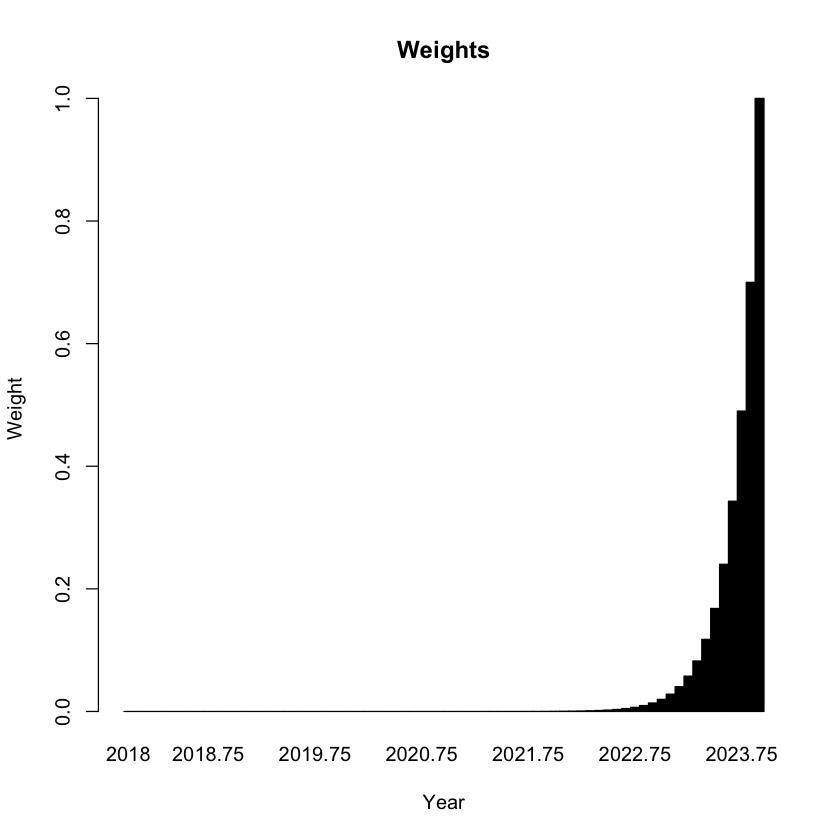

In [13]:
xx <- Dtrain$year # # Extracts it as a numeric vector
y <- Dtrain$total

N <-length((y))
lambda <- 0.7
w <- lambda^(N - (1:N))
par(bg = "white")
barplot(w, names.arg = xx, col = "black", border = "black", 
        xlab = "Year", ylab = "Weight", main = "Weights",
        space = 0)

## 3.3

In [14]:
sum(w)
length(y)


[1] 3.333333

[1] 72

## 3.4 og 3.5

Warning message in sig2 * (1 + rowSums((x_future %*% solve(t(x) %*% solve(SIGMA) %*% :
"Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead."


,-15.739978592
xx,0.009370982


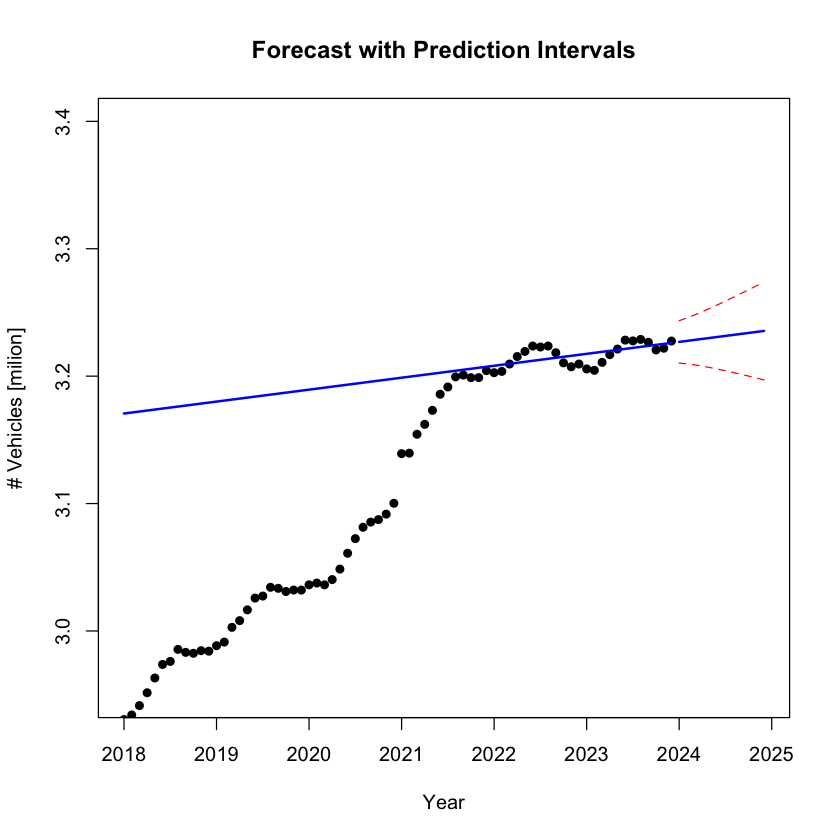

In [15]:
SIGMA = diag(1/w)
xx <- Dtrain$year # # Extracts it as a numeric vector
y <- Dtrain$total


x <-cbind(1,xx)
parameters <- solve(t(x)%*%solve(SIGMA)%*%x)%*%t(x)%*%solve(SIGMA)%*%y


# epsilon 
epsilon <- y -x%*%parameters

# An unbiased estimate of σ2 is from Theorem 3.4 (3.44)
N <- length(y) # number of observations
p <- length(parameters) # number of parameters?? 
T <- sum(w)
sig2 <- t(epsilon)%*%solve(SIGMA)%*%epsilon/(T-p)

next12months = seq(xx[length(xx)]+1/12,xx[length(xx)]+1,1/12)

x_future=cbind(1,next12months)

predictions12months = x%*%parameters

# Predictions
predictions12months <- x_future %*% parameters

pred_se <- sqrt(sig2 * (1 + rowSums((x_future %*% solve(t(x) %*%solve(SIGMA)%*% x)) * x_future)))

# Compute upper bound of prediction interval
t_value <- qt(0.025, N - p)  # 95% confidence interval, so alpha/2 = 0.025
upperbound <- predictions12months + t_value * pred_se
lowerbound <- predictions12months - t_value * pred_se

par(bg = "white")

plot(xx, y, pch = 16, col = "black", xlab = "Year", ylab = "# Vehicles [milion]", main = "Forecast with Prediction Intervals",xlim = c(min(xx), max(next12months)),ylim = range(2.95,3.4, predictions12months))
lines(xx, parameters[1] + parameters[2] * xx, col = "blue", lwd = 2)  # Regression line
lines(next12months, predictions12months, col = "blue", lwd = 2)  # Future predictions
lines(next12months, upperbound, col = "red", lty = 2)  # Upper bound
lines(next12months, lowerbound, col = "red", lty = 2) 
parameters


In [6]:
parameters

,-52.4828617
xx,0.0275299
